<a href="https://colab.research.google.com/github/xparisax/random-problems/blob/master/marketplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The attached CSV file is a sample data for an online marketplace. The file contains the following columns:
* user_id: the id of the users
* Date: the date of the purchase
* device: the device they have used to operate the purchase
* location: the location of the delivery
* purchase_amount: the amount of purchase

drawing out as much insight as possible from this

While making insight, we should keep in mind that we don't have enough information about this marketplace. E.g. is it just a website or does it have an application too? Does it have its warehouse? Are there only physical products? Has it just started? Nor we have enough data about which products have been sell, what is the monthly cost, etc.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv(root_dir+"/Assessment_Dataset.csv")
df.head(3)

,user_id,Date,device,location,purchase_amonut
0,1,6/16/2014,lenovo thinkpad,Tehran,50000
1,2,7/27/2014,samsung galaxy note,Tehran,70000
2,2,6/18/2014,samsung galaxy note,Tehran,180000


In [0]:
df.rename(columns={"purchase_amonut":"purchase"}, inplace = True)
df["Date"] = pd.to_datetime(df["Date"])
df.head(2)

,user_id,Date,device,location,purchase
0,1,2014-06-16,lenovo thinkpad,Tehran,50000
1,2,2014-07-27,samsung galaxy note,Tehran,70000


# Sales Revenue

In [0]:
rev_df = df.copy()
rev_df.set_index("Date", inplace=True)
rev_df.sort_index(inplace=True)

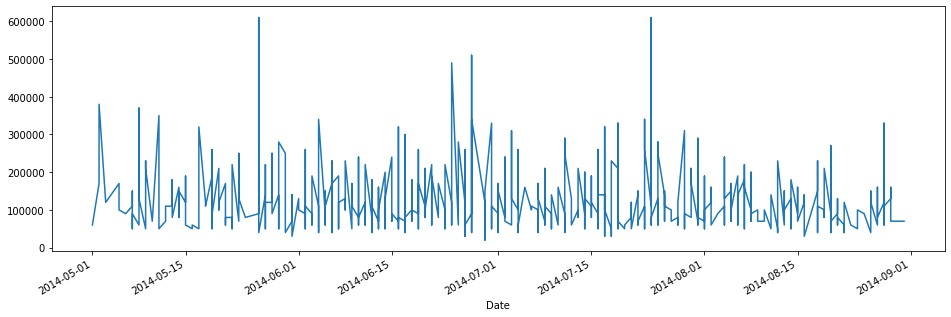

In [0]:
rev_df["purchase"].plot(figsize=(16,5))

Purchase over time figure doesn't give us the information we need. Although it's important to know about daily income, we can't tell if the sales have been increased or not. But it's good that we don't see gaps.

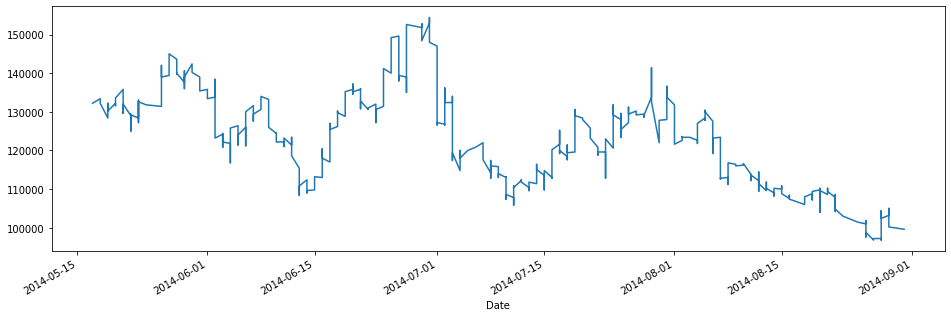

In [0]:
rev_df["purchase"].rolling(50).mean().plot(figsize=(16,5))

By taking the mean of the purchases over time the unfortunate conclusion may be driven and that is: the overall sales have dropped by the end of August. It's important to know about the product to see why that has happened. It may be because of seasonal issues. E.g. this data is for mid-spring till mid-summer and it may be the case here that the online shops only sell winter clothing. Also, the website may have some bugs or simply the customers are not satisfied with the products. That would be great if we knew about the return policy and the return cases.

But by looking at the monthly revenue and the fluctuation in the 1st figure of this section, we can see that the decrease might not be unfortunate and that, it is caused because of the way their mean is calculated using 50 data point each time. So let's take a closer look!

In [0]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df.tail(3)

,user_id,Date,device,location,purchase,month
783,18,2014-06-16,macbook pro,Kerman,120000,6
784,18,2014-05-31,nexus 5,Kerman,70000,5
785,18,2014-05-08,nexus 5,Kerman,60000,5


<BarContainer object of 4 artists>

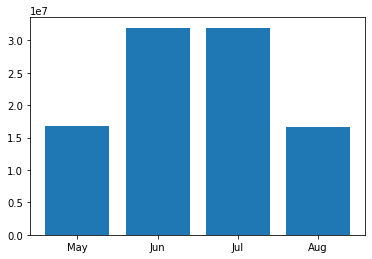

In [0]:
gb = df.groupby("month")
ave=[]
ave_p_c=[]

for i in sorted(df['month'].unique()):
    customers = len(df['user_id'][df.month == i].unique())
    gb_df = gb.get_group(i)
    ave.append(gb_df["purchase"].sum())
    ave_p_c.append(gb_df["purchase"].sum()/customers)

plt.bar(['May','Jun','Jul','Aug'], ave)

<BarContainer object of 4 artists>

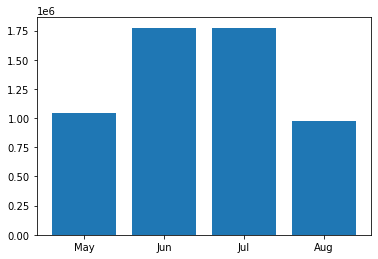

In [0]:
plt.bar(['May','Jun','Jul','Aug'], ave_p_c)

* Monthly purchases made by customers. This figure shows us that till August total purchase amount has not decreased significantly and the rolling mean can't be trusted because the amount of the purchases made by the end of the fourth month is less than Jun and July.
* Monthly average revenue per customer should be smaller than customers' acquisition costs. In that way, we can profit. Due to the lack of data about probable acquisition costs, we can't say much about this figure.


# Purchase Behavior

In [0]:
laptop_df = df.copy()[df.device.isin(['lenovo thinkpad','dell inspiron desktop','hp pavilion desktop','macbook pro','dell inspiron notebook','asus chromebook',
                  'windows surface','acer aspire notebook','macbook air','acer aspire desktop', 'mac mini'])]

phone_df = df.copy()[df.device.isin(['samsung galaxy note','kindle fire','nexus 10','ipad mini','nokia lumia 635','nexus 5', 'iphone 5','ipad air','iphone 4s',
                 'iphone 5s','samsung galaxy s4', 'nexus 7'])]

In [0]:
lap_rev_df = laptop_df.copy()
lap_rev_df.set_index("Date", inplace=True)
lap_rev_df.sort_index(inplace=True)

In [0]:
phn_rev_df = phone_df.copy()
phn_rev_df.set_index("Date", inplace=True)
phn_rev_df.sort_index(inplace=True)

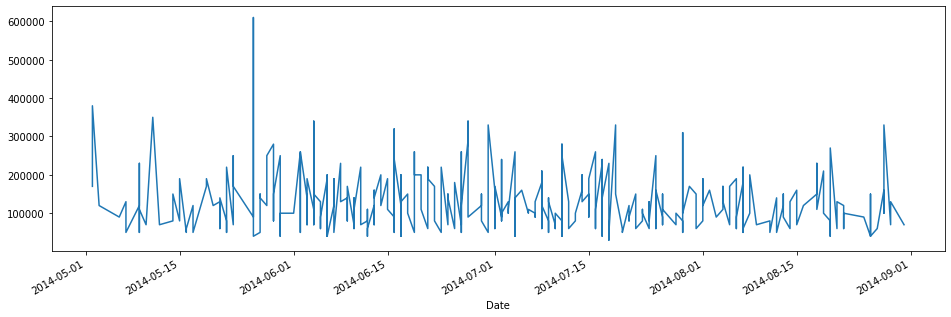

In [0]:
lap_rev_df["purchase"].plot(figsize=(16,5))

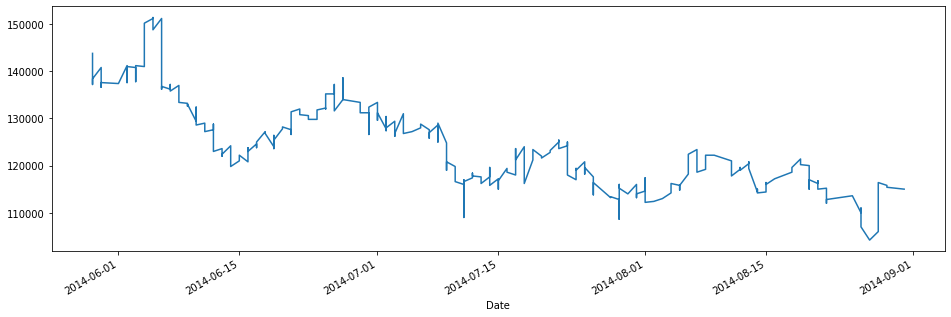

In [0]:
lap_rev_df["purchase"].rolling(50).mean().plot(figsize=(16,5))

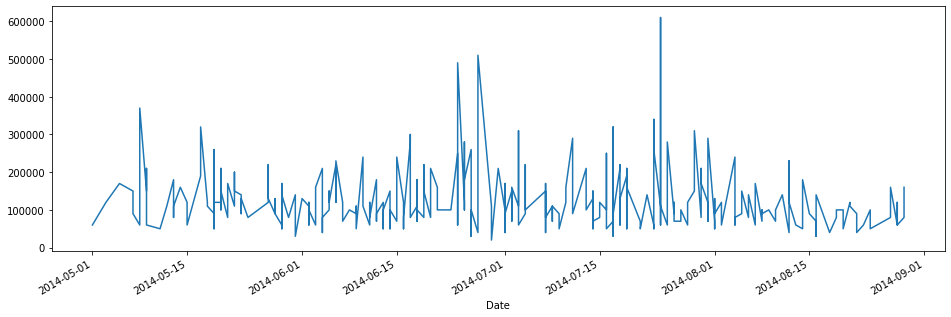

In [0]:
phn_rev_df["purchase"].plot(figsize=(16,5))

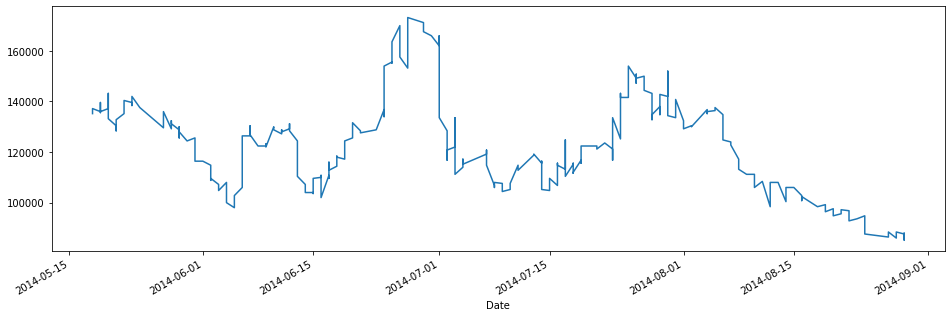

In [0]:
phn_rev_df["purchase"].rolling(25).mean().plot(figsize=(16,5))

Again, by looking at purchases made by a laptop over time (1st figure) vs. purchases made by phone (2nd figure), we can see the same fluctuation as the 'purchases over time' figure and, so far, the same conclusions can be made.

In [0]:
lap_stat = lap_rev_df.groupby('location')['purchase'].agg(["sum", "mean", "std"])
lap_stat

,sum,mean,std
location,,,
Alborz,1210000,100833.333333,67481.759601
East Azarbaijan,4780000,116585.365854,52991.025471
Fars,4920000,140571.428571,67777.441030
Gilan,3230000,124230.769231,85284.140468
Hamadan,1310000,109166.666667,47569.725539
Isfahan,4290000,126176.470588,71181.147737
Kerman,1800000,150000.000000,109378.409038
Kermanshah,580000,82857.142857,54989.176424
Khuzestan,920000,92000.000000,29739.610698


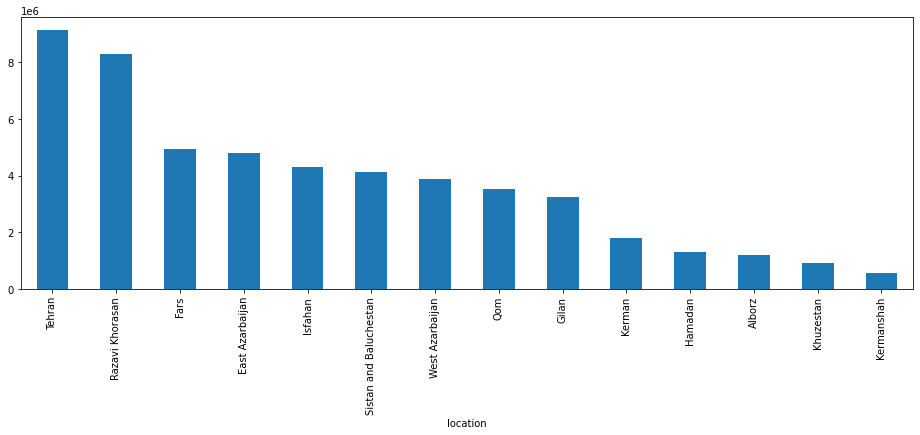

In [0]:
lap_stat.sort_values(by=['sum'],ascending=False)['sum'].plot.bar(figsize=(16,5))

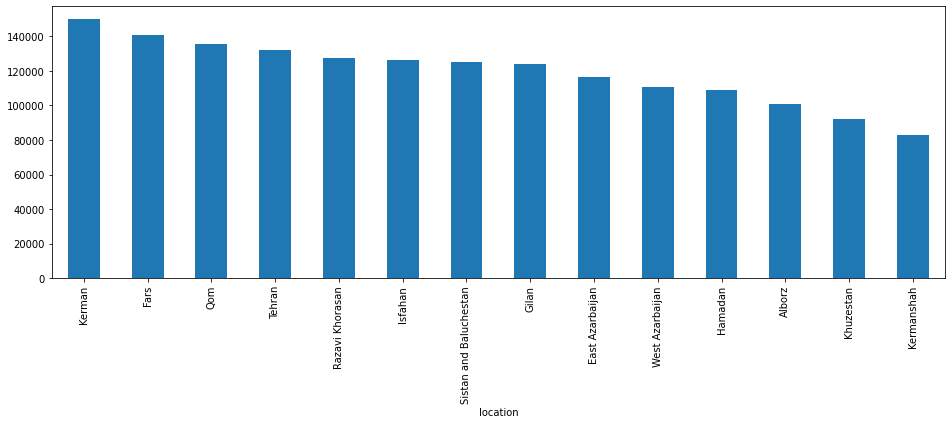

In [0]:
lap_stat.sort_values(by=['mean'],ascending=False)['mean'].plot.bar(figsize=(16,5))

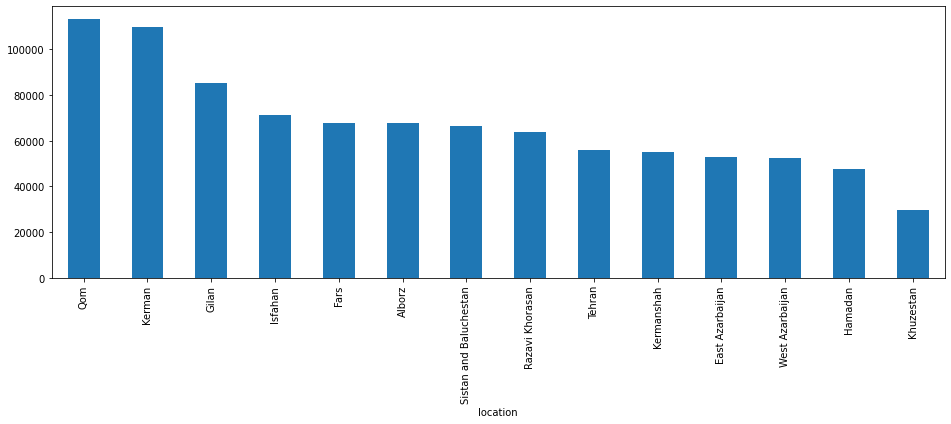

In [0]:
lap_stat.sort_values(by=['std'],ascending=False)['std'].plot.bar(figsize=(16,5))

<BarContainer object of 14 artists>

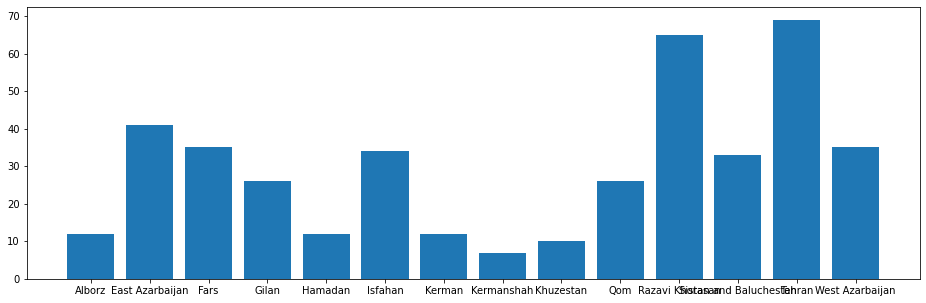

In [0]:
num_pur_c=[]
for city in sorted(laptop_df.location.unique()):
    num_pur_c.append(laptop_df[laptop_df.location == city].shape[0])
    
plt.figure(figsize=(16, 5))
plt.bar(sorted(laptop_df.location.unique()),num_pur_c,)

Here, we observe purchases made by laptop users in different cities. the lower the 'std' is for each city, the more purchases are closer to the mean of that city. Meaning that cities like Khuzestan and Hamedan purchases are closer to the mean of those cities. And it makes the mean of the cities with lower std, more reliable.

In [0]:
phn_stat = phn_rev_df.groupby('location')['purchase'].agg(["sum", "mean", "std"])
phn_stat

,sum,mean,std
location,,,
Alborz,4980000,124500.000000,67896.980787
East Azarbaijan,590000,98333.333333,38686.776380
Fars,1300000,118181.818182,57761.264151
Gilan,1710000,100588.235294,36136.994243
Hamadan,4170000,119142.857143,64688.003642
Isfahan,2970000,118800.000000,52703.573566
Kerman,2790000,126818.181818,76804.412301
Kermanshah,4410000,133636.363636,58992.487966
Khuzestan,4690000,130277.777778,107822.237598


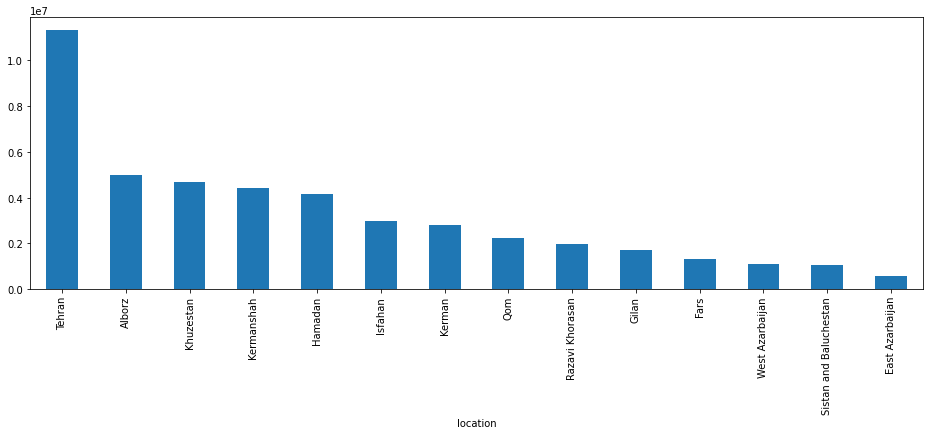

In [0]:
phn_stat.sort_values(by=['sum'],ascending=False)['sum'].plot.bar(figsize=(16,5))

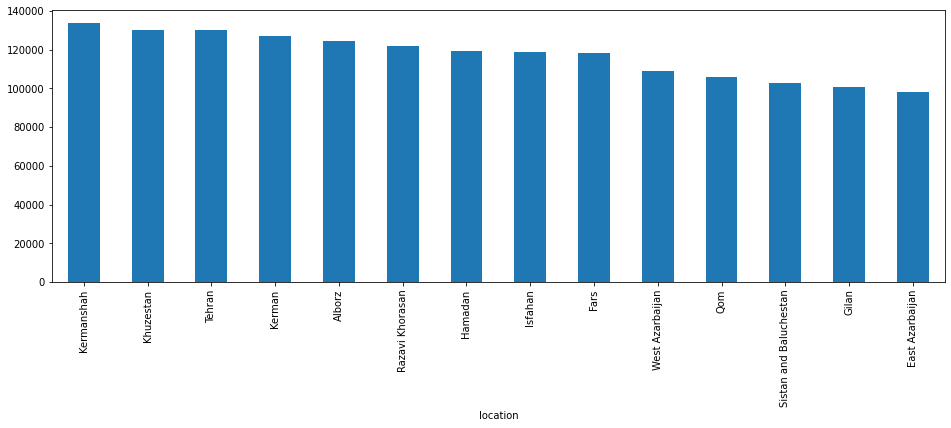

In [0]:
phn_stat.sort_values(by=['mean'],ascending=False)['mean'].plot.bar(figsize=(16,5))

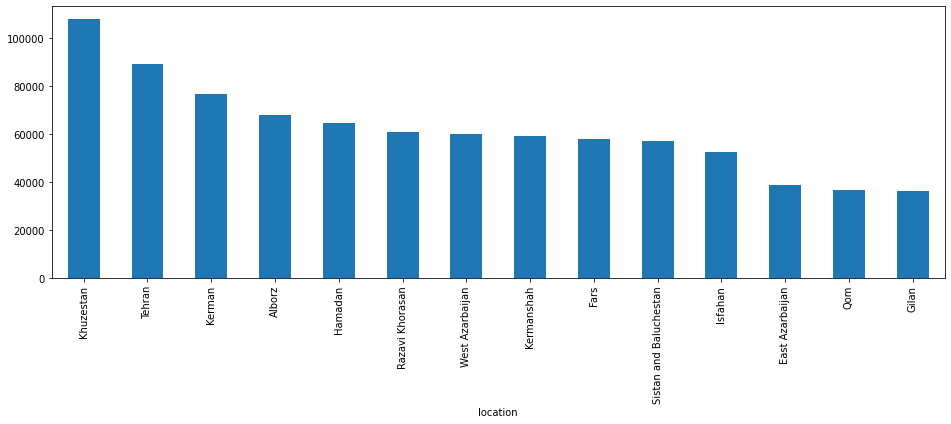

In [0]:
phn_stat.sort_values(by=['std'],ascending=False)['std'].plot.bar(figsize=(16,5))

<BarContainer object of 14 artists>

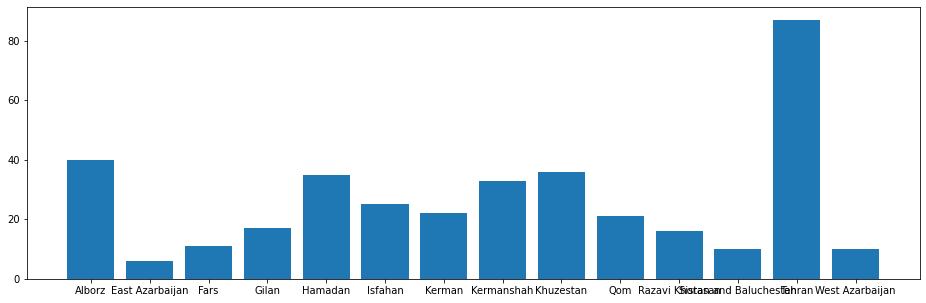

In [0]:
num_pur_c=[]
for city in sorted(phone_df.location.unique()):
    num_pur_c.append(phone_df[phone_df.location == city].shape[0])
    
plt.figure(figsize=(16, 5))
plt.bar(sorted(phone_df.location.unique()),num_pur_c,)

The same applies to mobile phone users. E.g phone users in Khuzestan are more than their laptop users. (Pay attention that this time, Khuzestan's mean can't be trusted due to its hight std.) That may be because it's easier to use a phone due to not having a pc, not having proper wifi access, etc.

Also, the last figure shows us the total number of purchases made in each city by laptop and phone users. That is to say, e.g. in Khuzestan customers purchase more by phone.

In [0]:
laptop_pur=[]
phone_pur=[]
laptop_am=[]
phone_am=[]
for m in sorted(df["month"].unique()):
    laptop_pur.append(laptop_df.purchase[laptop_df.month == m].sum())
    laptop_am.append(laptop_df.purchase[laptop_df.month == m].shape[0])
    phone_pur.append(phone_df.purchase[phone_df.month == m].sum())
    phone_am.append(phone_df.purchase[phone_df.month == m].shape[0])

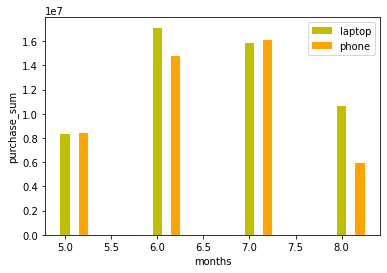

In [0]:
x = np.arange(5,9)

plt.bar(x, laptop_pur, label="laptop", width=.1, color = 'y')
plt.bar(x+.2, phone_pur, label="phone", width=.1, color='orange')

plt.legend()
plt.xlabel('months')
plt.ylabel('purchase_sum')

plt.show()

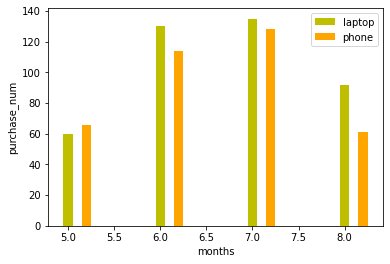

In [0]:
x = np.arange(5,9)

plt.bar(x, laptop_am, label="laptop", width=.1, color = 'y')
plt.bar(x+.2, phone_am, label="phone", width=.1, color='orange')

plt.legend()
plt.xlabel('months')
plt.ylabel('purchase_num')

plt.show()

Each month, laptop and phone users spend about the same amount of money and the same total number of purchases, therefore, it is important to focus on both phone and laptop support and troubleshoot.

# Cities

<BarContainer object of 14 artists>

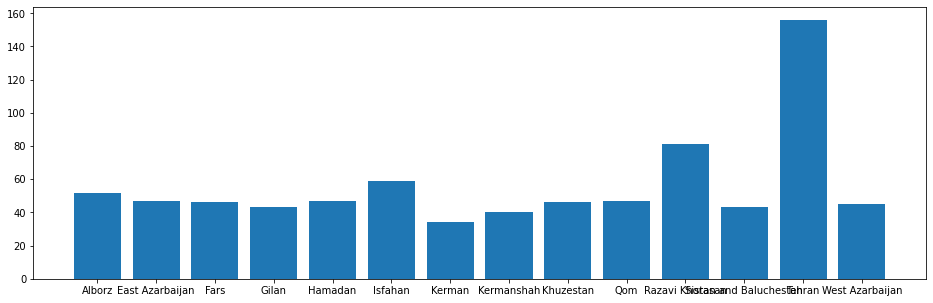

In [0]:
num_pur_c=[]
for city in sorted(df.location.unique()):
    num_pur_c.append(df[df.location == city].shape[0])
    
plt.figure(figsize=(16, 5))
plt.bar(sorted(df.location.unique()),num_pur_c,)

Due to this figure, Tehran users make more number of purchases than the other cities.

In [0]:
loc_stat = df.groupby('location')['purchase'].agg(["sum", "mean", "std"])
loc_stat

,sum,mean,std
location,,,
Alborz,6190000,119038.461538,67888.594306
East Azarbaijan,5370000,114255.319149,51403.970446
Fars,6220000,135217.391304,65616.364166
Gilan,4940000,114883.720930,70453.364955
Hamadan,5480000,116595.744681,60443.167548
Isfahan,7260000,123050.847458,63605.850883
Kerman,4590000,135000.000000,88702.772325
Kermanshah,4990000,124750.000000,60848.171706
Khuzestan,5610000,121956.521739,97333.780027


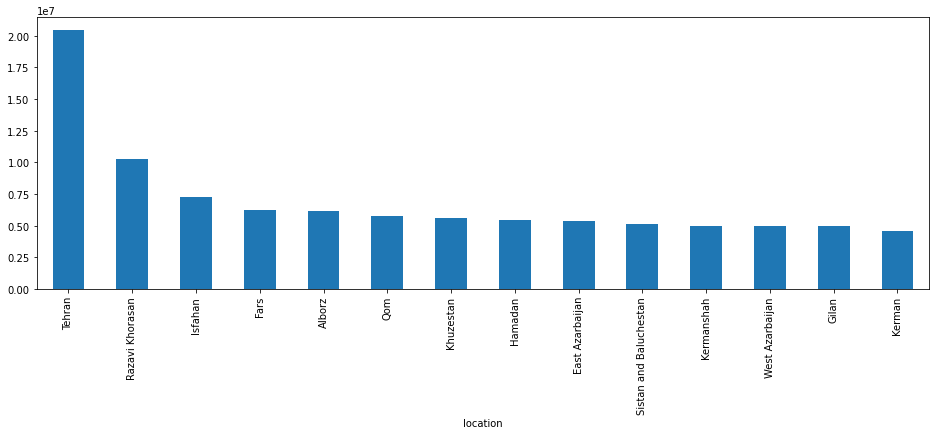

In [0]:
loc_stat.sort_values(by=['sum'],ascending=False)['sum'].plot.bar(figsize=(16,5))

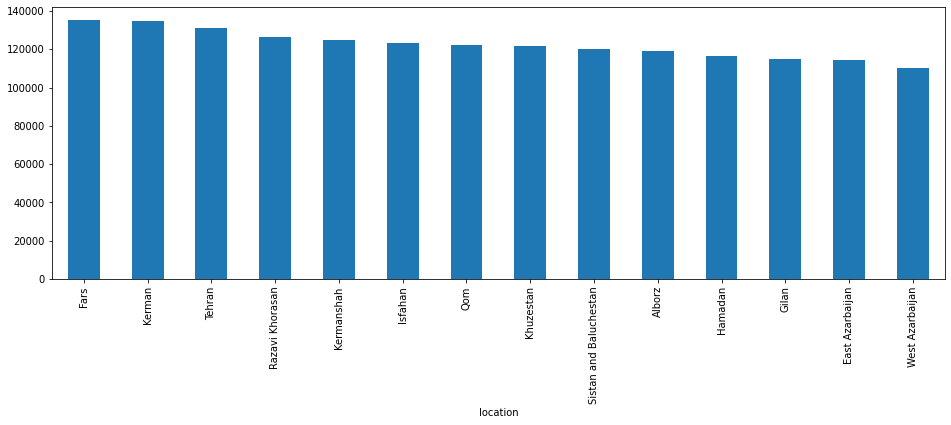

In [0]:
loc_stat.sort_values(by=['mean'],ascending=False)['mean'].plot.bar(figsize=(16,5))

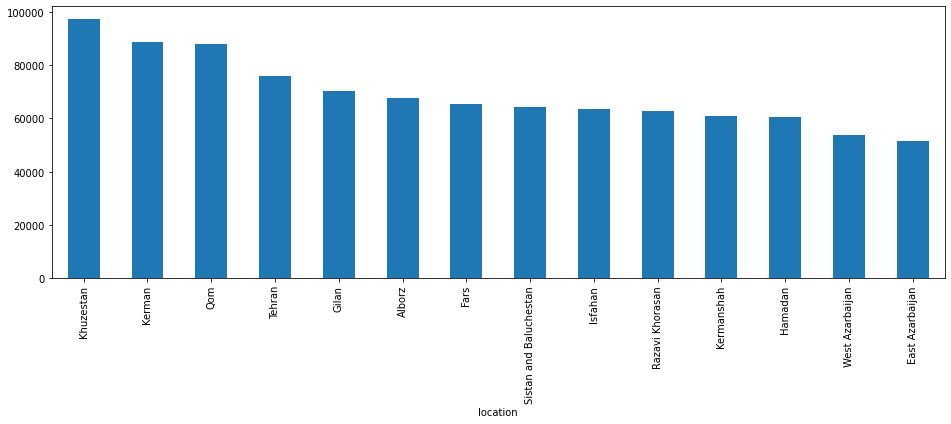

In [0]:
loc_stat.sort_values(by=['std'],ascending=False)['std'].plot.bar(figsize=(16,5))

The same insights can be driven from the above figures as the laptop and phone users. It's important to understand why we see fewer purchases made in other cities. Is it because they don't usually buy things online? Do they have any return policy issues if any? Do they use other local websites?(AKA. are there less users in others cities?) etc.

In [0]:
month = [[] for i in df["month"].unique()]
for m in sorted(df["month"].unique()):
    for city in sorted(df["location"].unique()):
        m_rev_c = df.purchase[(df.location == city) & (df.month == m)].sum()
        month[m-5].append(m_rev_c)

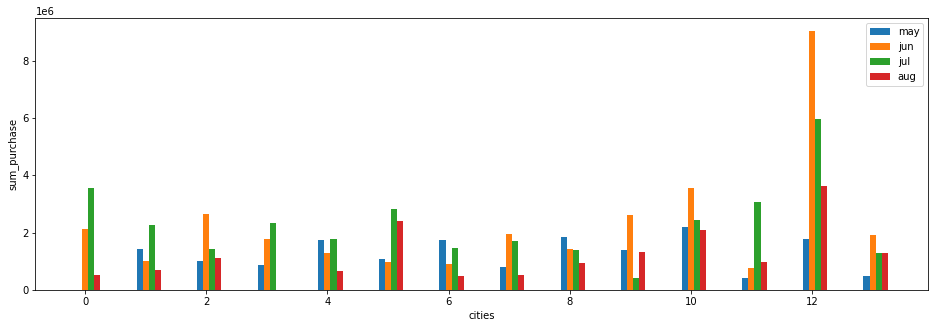

In [0]:
x = np.arange(14)
plt.figure(figsize=(16, 5))
plt.bar(x-.1,month[0], label="may", width=.1)
plt.bar(x,month[1], label="jun", width=.1)
plt.bar(x+.1,month[2], label="jul", width=.1)
plt.bar(x+.2,month[3], label="aug", width=.1)
plt.legend()
plt.xlabel('cities')
plt.ylabel('sum_purchase')

plt.show()

Here, we can see a plot showing total monthly purchases in each city (sorted alphabetically). We can observe that customers in Alborz did not purchase anything in May. looking at May purchases, it sounds like people were not familiar with the site or probably, simply preferred not to buy many things due to seasonal reasons.

Jun and July show a relevantly higher total purchase than August. And August shares the least purchase among other months and it seems like we've lost customers in a city (Guilan).

# User Behavior

In [0]:
pur_count = []
for user in sorted(df.user_id.unique()):
    pur_count.append(df[df.user_id == user].shape[0])

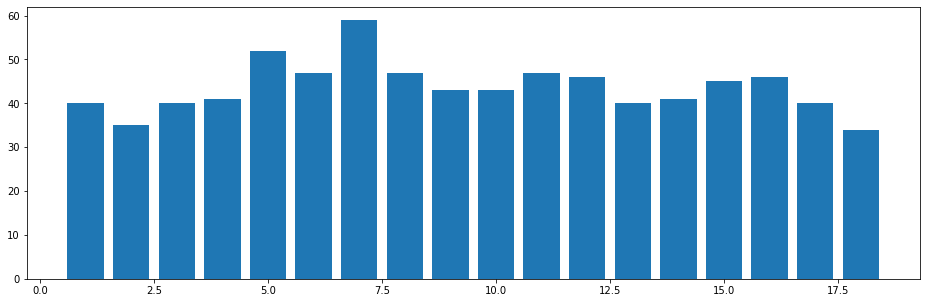

In [0]:
plt.figure(figsize=(16, 5))
plt.bar(range(1,19), pur_count)
plt.show()

Due to the bar chart above, the total numbers of purchases made by users are about the same.

In [0]:
pur_amount = []
for user in sorted(df.user_id.unique()):
    pur_amount.append(df.purchase[df.user_id == user].sum())

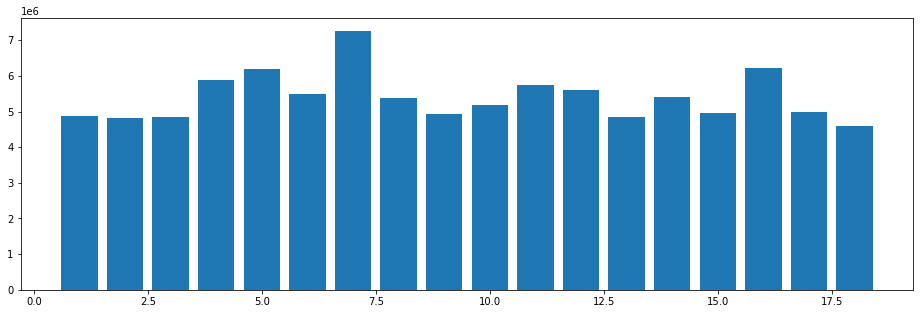

In [0]:
plt.figure(figsize=(16, 5))
plt.bar(range(1,19), pur_amount)
plt.show()

Also, users' total purchase amounts are about the same too. And about the same as the number of their purchases, meaning the more they have purchased relevantly the more they have paid.

In [0]:
month = [[] for i in sorted(df["month"].unique())]
for m in sorted(df["month"].unique()):
    for user in sorted(df["user_id"].unique()):
        m_rev_u = df.purchase[(df.user_id == user) & (df.month == m)].sum()
        month[m-5].append(m_rev_u)

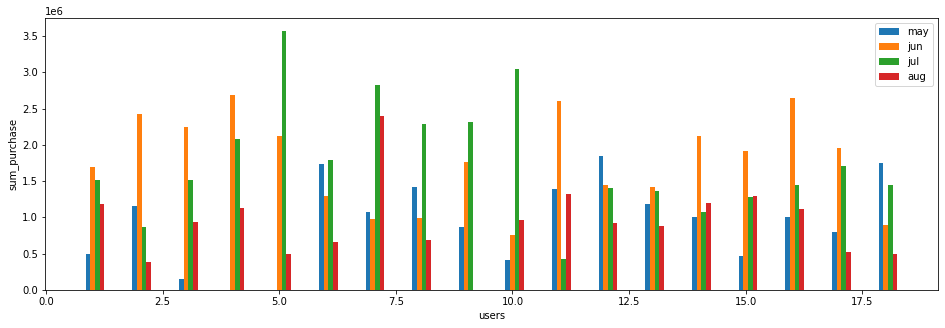

In [0]:
x = np.arange(1,19)
plt.figure(figsize=(16, 5))
plt.bar(x-.1,month[0], label="may", width=.1)
plt.bar(x,month[1], label="jun", width=.1)
plt.bar(x+.1,month[2], label="jul", width=.1)
plt.bar(x+.2,month[3], label="aug", width=.1)
plt.legend()
plt.xlabel('users')
plt.ylabel('sum_purchase')

plt.show()

Looking at each users' purchase in each month, we can see that in August we've lost a user and that doesn't seem to be because of seasonal reasons, Due to other users' purchases during that month. Also, two users have joined in Jun or probably they didn't buy anything during May.

In [0]:
month = [[] for i in sorted(df["month"].unique())]
for m in sorted(df["month"].unique()):
    for user in sorted(df["user_id"].unique()):
        m_rev_u = df.purchase[(df.user_id == user) & (df.month == m)].shape[0]
        month[m-5].append(m_rev_u)

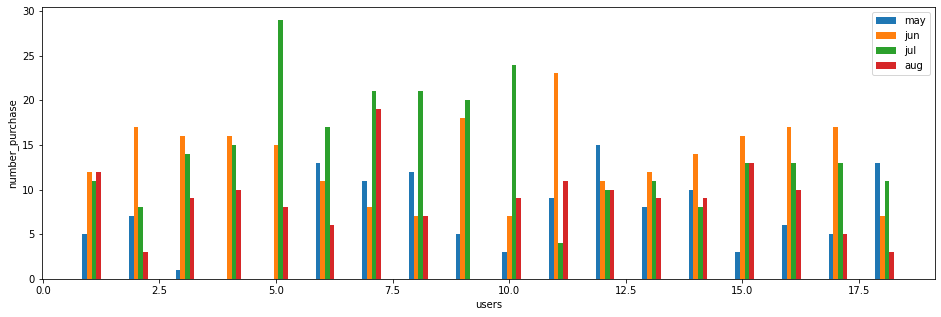

In [0]:
x = np.arange(1,19)
plt.figure(figsize=(16, 5))
plt.bar(x-.1,month[0], label="may", width=.1)
plt.bar(x,month[1], label="jun", width=.1)
plt.bar(x+.1,month[2], label="jul", width=.1)
plt.bar(x+.2,month[3], label="aug", width=.1)
plt.legend()
plt.xlabel('users')
plt.ylabel('number_purchase')

plt.show()

By looking at the total number of purchases made by users during four months, user numbers 4 and 5 have made quite a good number of purchases, therefore, it is more probable that they are new to the site. And user number 9 might purchase more later on, due to his/her monthly purchases, but it would be better to send a follow-up message to encourage him/her to visit our site.

It's good to know who is our best customer. That is by knowing which customers pay higher or by knowing who buys regularly. In this data, it sounds like most customers' purchase behaviors are about the same, but we can roughly say that user number 7 has regularly purchased something from the website through May till August and he/she has made the most purchases and highest total purchase amount.

# Conclusion

In conclusion, it seems like users don't struggle while using their laptops or phones. And it's important to support both types of devices.
Tehran users are more familiar with the site and make the most purchase but other users make fewer purchases which may be due to other local companies' existence or preferences or probable delivery problems they have faced. More data is needed to dig deeper into why the total sales are much less in other cities and do seasonal market influence this marketplace?
It's important to understand why users purchase less in specific months? And is it influencing customer loss over time? Or is it just simply because they have purchased more in another month and they don't need a product right now? Anyways it's better to keep an eye and send follow-up messages.